In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [6]:
df = pd.read_excel('/content/dataset1.xlsx')

In [7]:
df.head()

,Date,Close-Last,Volume,Open,High,Low
0,08-17-2023,23.042,11441,22.800,23.385,22.725
1,08-16-2023,22.856,10802,22.905,23.170,22.770
2,08-15-2023,22.656,60396,22.650,22.770,22.265
3,08-14-2023,22.708,51908,22.740,22.820,22.410
4,2023-11-08 00:00:00,22.743,48043,22.760,22.910,22.610


In [8]:
df.tail()

,Date,Close-Last,Volume,Open,High,Low
2534,08-23-2013,23.781,20102,23.235,24.140,22.935
2535,08-22-2013,23.080,12238,22.920,23.365,22.500
2536,08-21-2013,23.009,7326,23.020,23.400,22.810
2537,08-20-2013,23.118,14280,23.200,23.350,22.320
2538,08-19-2013,23.215,8249,23.330,23.640,23.010


In [9]:
df.shape

(2539, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2539 entries, 0 to 2538
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2539 non-null   object 
 1   Close-Last  2539 non-null   float64
 2   Volume      2539 non-null   object 
 3   Open        2539 non-null   float64
 4   High        2539 non-null   float64
 5   Low         2539 non-null   float64
dtypes: float64(4), object(2)
memory usage: 119.1+ KB


In [11]:
df.isnull().sum()

Date          0
Close-Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [12]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2534    False
2535    False
2536    False
2537    False
2538    False
Length: 2539, dtype: bool

In [13]:
df.describe()

,Close-Last,Open,High,Low
count,2539.000000,2539.000000,2539.000000,2539.000000
mean,19.132079,19.142883,19.360299,18.905609
std,3.750198,3.762177,3.826964,3.672283
min,11.772000,11.975000,12.330000,11.640000
25%,16.265000,16.257500,16.427500,16.107500
50%,17.815000,17.850000,18.010000,17.665000
75%,22.104500,22.195000,22.475000,21.847500
max,29.418000,29.235000,30.350000,28.300000


In [14]:
df['Volume'] = df['Volume'].replace('N-A', 0)

<ipython-input-15-a48d1b993742>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

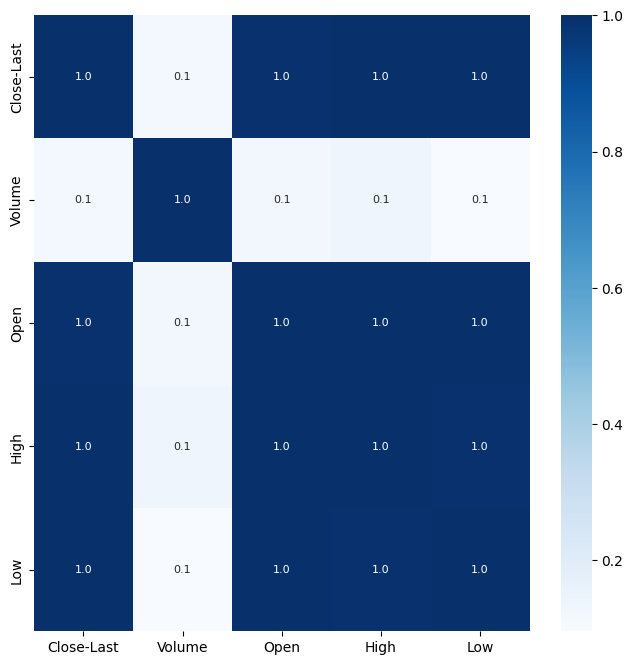

In [15]:
correlation = df.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, fmt='.1f',annot=True, annot_kws={'size':8},cmap='Blues')

In [16]:
print(correlation['Close-Last'])

Close-Last    1.000000
Volume        0.115009
Open          0.995908
High          0.997948
Low           0.998184
Name: Close-Last, dtype: float64


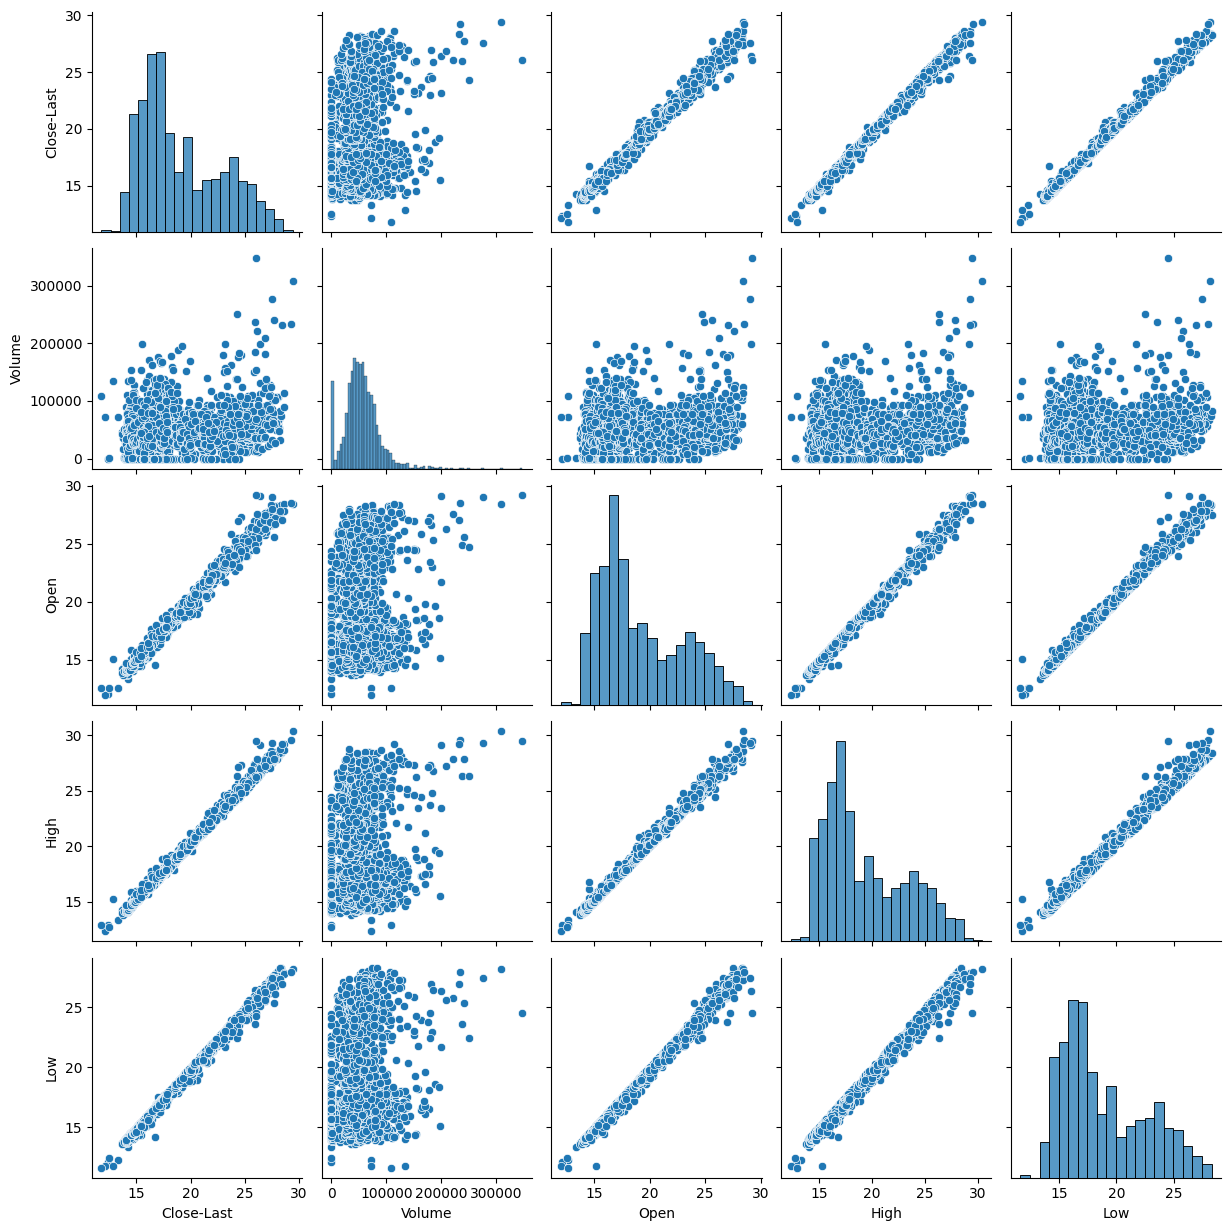

In [17]:
sns.pairplot(df)

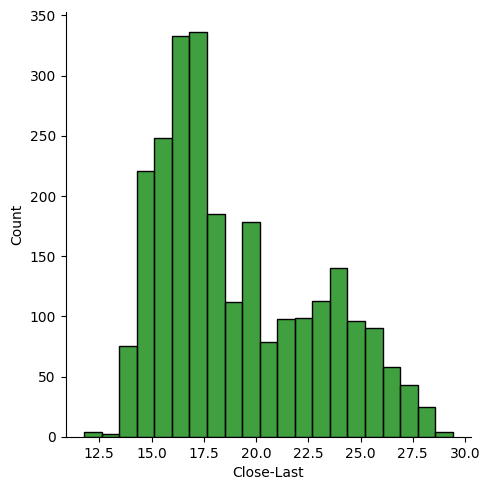

In [19]:
sns.displot(df['Close-Last'],color='green')

Splitting the features and target

In [20]:
X = df.drop(['Date','Close-Last'],axis=1)
y = df['Close-Last']

In [21]:
print(y)

0       23.042
1       22.856
2       22.656
3       22.708
4       22.743
         ...  
2534    23.781
2535    23.080
2536    23.009
2537    23.118
2538    23.215
Name: Close-Last, Length: 2539, dtype: float64


spliting into training data and test data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)


In [25]:
print(X_train.shape,X_test.shape)

(2031, 4) (508, 4)


Model training Random Forest Regressor

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

MODELLING DATA

In [28]:
test_data_prediction = regressor.predict(X_test)

In [29]:
print(test_data_prediction)

[15.64779 25.14585 16.75434 19.75552 19.42743 23.59882 22.23873 19.28079
 17.32252 16.57011 18.9755  24.03501 14.8259  17.92671 17.42983 15.49261
 15.3603  12.49803 23.25033 25.4766  16.63387 16.60905 16.18001 21.86353
 17.46801 26.26379 19.96996 15.97928 17.03561 15.04636 22.96641 16.55013
 16.23586 21.29389 27.26271 21.72564 16.46772 15.99225 14.93112 16.45418
 16.53717 25.53061 16.56429 15.33374 16.22674 19.46396 16.92898 19.98251
 25.51345 17.70257 23.51045 17.00658 22.90825 19.143   27.01952 25.56271
 19.39881 19.31078 24.18693 16.75243 14.76427 14.46323 14.38361 24.16073
 17.72062 17.58676 21.72285 14.95195 19.44636 15.90259 17.07154 14.4891
 24.35027 17.02739 21.89136 16.5542  21.05483 19.2645  20.18241 20.16621
 14.23137 16.42055 15.12795 19.99337 24.55898 17.03829 15.60835 27.17789
 16.67319 16.79733 24.08915 16.18679 21.2012  14.83553 19.87813 22.45119
 20.80021 17.91915 15.66898 23.56782 27.61848 14.6857  19.11933 17.87635
 20.49538 16.87108 16.75235 13.99623 14.60078 15.604

In [30]:
error_score = metrics.r2_score(y_test,test_data_prediction)
print("R squared : ", error_score)

R squared :  0.9982500449642964


. R-squared is not an error, but rather a measure of the goodness of fit of a regression model. It is used to evaluate how well the independent variable(s) in your model explain the variation in the dependent variable.

R-squared (R²): R-squared ranges from 0 to 1, where 0 indicates that the model does not explain any of the variance in the dependent variable, and 1 indicates a perfect fit. In practice, a "good" R-squared value is highly context-dependent. It's common to see R-squared values between 0.7 and 0.9 in some fields, but lower values may also be

Compared the actual predicted values in a plot

In [31]:
y_test = list(y_test)

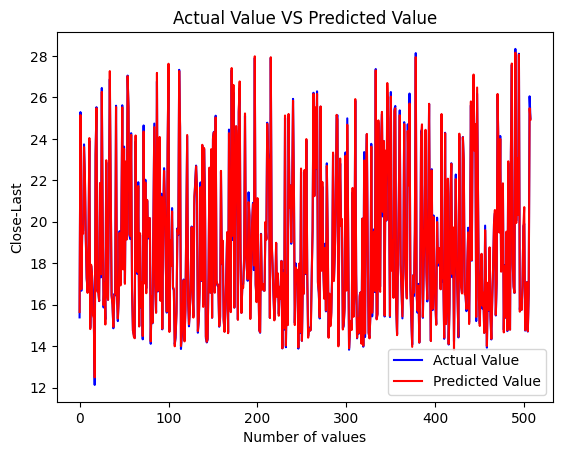

In [32]:
plt.plot(y_test, color='blue', label='Actual Value')
plt.plot(test_data_prediction, color='red',label = 'Predicted Value')
plt.xlabel('Number of values')
plt.ylabel('Close-Last')
plt.legend()
plt.title('Actual Value VS Predicted Value')
plt.show()